# Muertes a manos de la policía de Estados Unidos.

## Autor: Gonzalo Carretero Ursúa

### INTRODUCCIÓN

###### En este informe se analizan las personas muertas debido a una acción policial, la reacción que tuvieron y lugar en el que se encontraban en el momento exacto. 
###### El objetivo de este informe es ver si existe algún patrón común entre los fallecidos para tratar de concluir si puede existir algún comportamiento predeterminado por la policía americana a la hora de actuar. También se trata de analizar los fallecimientos por Estado para tratar de explicar la posible diferencia entre unos Estados y otros.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
os.getcwd() # De la libreria os, nos ayuda a conocer el camino hasta este archivo.

'/Users/gonzalocarretero/Desktop/Lab1/notebooks'

### DATOS

In [33]:
# Cargar los datos que se encuentran en la carpeta 'data' del proyecto Lab1.
shootings = pd.read_csv('/Users/gonzalocarretero/Desktop/Lab1/data/shootings.csv', header = 0, delimiter = ',') 
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [34]:
shootings.dtypes #Conocemos el tipo de datos que tiene cada columna 

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

###### El Dataset esta compuesto principalmete por variables categóricas. Sólo hay dos numéricas, un entero para el id y la edad que nos la muestra con un decimal. Tenemos también dos variables, enfermedad mental y si el policía tenía camara, compuestas de booleanos.

In [35]:
shootings.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

###### Este Dataset no contiene NA, por tanto tenemos información de todas las variables en todas las observaciones.

In [36]:
# Transformo la variable edad a un número entero, ya que el decimal siempre era 0. (No es estrictamente necesario)
shootings['age'] = shootings['age'].astype(np.int64)

In [37]:
shootings.shape #(Número de filas, columnas o variables)

(4895, 15)

###### El dataframe está compuesto por 15 variables y 4895 observaciones.

In [38]:
shootings.info

<bound method DataFrame.info of         id                name        date   manner_of_death       armed  age  \
0        3          Tim Elliot  2015-01-02              shot         gun   53   
1        4    Lewis Lee Lembke  2015-01-02              shot         gun   47   
2        5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed   23   
3        8     Matthew Hoffman  2015-01-04              shot  toy weapon   32   
4        9   Michael Rodriguez  2015-01-04              shot    nail gun   39   
...    ...                 ...         ...               ...         ...  ...   
4890  5916     Rayshard Brooks  2020-06-12              shot       Taser   27   
4891  5925      Caine Van Pelt  2020-06-12              shot         gun   23   
4892  5918        Hannah Fizer  2020-06-13              shot     unarmed   25   
4893  5921      William Slyter  2020-06-13              shot         gun   22   
4894  5924      Nicholas Hirsh  2020-06-15              shot         gun   31

### ANÁLISIS

In [39]:
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [40]:
shootings.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,5924,Nicholas Hirsh,2020-06-15,shot,gun,31,M,White,Lawrence,KS,False,attack,Car,False,Guns


###### El Dataset seleccionado  muestra las muertes a manos de la policía estadounidense desde el 1 de enero de 2015 hasta el 15 de junio de 2020.
###### Entre los datos podemos observar algunas caracteristicas del sujeto, cómo por ejemplo la raza y el género. Tambien se puede observar si iba armado o estaba huyendo, el Estado en el que se encontraba o que cuál fue la causa de la muerte.



In [41]:
shootings.describe() #Nos da solo los estadísticos de id y age por que son las variables numéricas


,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.547702
std,1683.467910,12.694266
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [42]:
shootings['age'].mean() #Media de edad de los fallecidos 

36.54770173646578

###### Se observa que la media de edad del fallecido se encuentra entre los 36 y 37 años. Se encuentran fallecidos desde los 6 años el más pequeño hasta los 91 años, el más mayor.


#### - Por raza

In [43]:
Race = pd.DataFrame(shootings.groupby(['race']).race.count().
                   sort_values(ascending=False))
Race 

,race
race,
White,2476
Black,1298
Hispanic,902
Asian,93
Native,78
Other,48


In [44]:
Race['%race'] = Race['race'].map(lambda x: x/4895*100)
Race    

,race,%race
race,,
White,2476,50.582227
Black,1298,26.516854
Hispanic,902,18.426966
Asian,93,1.899898
Native,78,1.593463
Other,48,0.980592


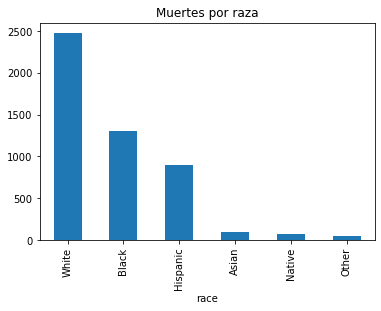

In [45]:
# Al utilizar Plot con el kind = 'bar' obtenemos un gráfico de barras que nos muestra la cantidad de fallecidos
# agrupados por la raza.

PlotRaza = Race['race'].plot(kind='bar', title='Muertes por raza')

###### Estas cifras vistas de forma absoluta pueden generar cierta duda. Para explicar estos datos considero necesario hacerlo relativamente a la composición de la población de los Estados Unidos.

###### Cómo observamos, la raza con mas defunciones es 'White', pero de acuerdo con Statista los blancos (no hispanos) componen el 62.2% de la población. La siguiente raza con mayor presencia en EEUU es la afroamericana, con un 12.4%. Viendo los datos del dataset el 26.5% de los fallecidos pertenecia a la comunidad afroamericana. En siguiente lugar están los hispanos, que representan el 17.4% de la población. El 18.4% de los fallecidos pertenecia a los hispanos. En último lugar se encuentran los asiaticos, que tienen una representación del 5.2% de la población americana y entre los fallecidos tan sólo el 1.9% eran de origen asiático.                                                             

#### - Por género 

In [47]:
Gender = pd.DataFrame(shootings.groupby(['gender']).gender.count().
                   sort_values(ascending=False))
Gender

,gender
gender,
M,4673
F,222


In [48]:
Gender['%gender'] = Gender['gender'].map(lambda x: x/4895*100)
Gender   

,gender,%gender
gender,,
M,4673,95.46476
F,222,4.53524


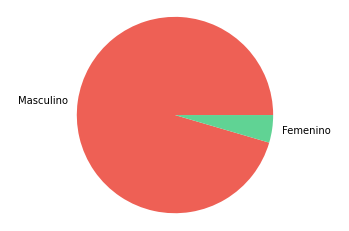

In [49]:
nombres = ['Masculino', 'Femenino']
colores = ["#EE6055","#60D394"]
plt.pie(Gender['gender'], labels=nombres, colors=colores)
plt.axis("equal")
plt.show()

###### - Enfermedad mental

In [80]:
Mental_illness = pd.DataFrame(shootings.groupby(['signs_of_mental_illness']).signs_of_mental_illness.count().
                   sort_values(ascending=False))
Mental_illness['%'] = Mental_illness['signs_of_mental_illness'].map(lambda x: x/4895*100)
Mental_illness

,signs_of_mental_illness,%
signs_of_mental_illness,,
False,3792,77.466803
True,1103,22.533197


###### En la mayoría de los casos el fallecido no presentaba ninguna enfermedad mental.

#### - Situación en la que se encontraba el fallecido

In [50]:
Armed = pd.DataFrame(shootings.groupby(['armed']).armed.count().
                   sort_values(ascending=False))
Armed['%armed'] = Armed['armed'].map(lambda x: x/4895*100)
Armed  

,armed,%armed
armed,,
gun,2755,56.281920
knife,708,14.463739
unknown,418,8.539326
unarmed,348,7.109295
toy weapon,171,3.493361
...,...,...
contractor's level,1,0.020429
pen,1,0.020429
chainsaw,1,0.020429


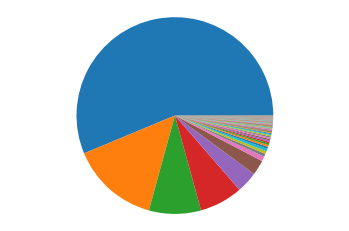

In [51]:
plt.pie(Armed['armed'])
plt.axis("equal")
plt.show()

###### En estos datos observamos que, lo más común, en más de un 56% de los casos, el sujeto que ha sido abatido portaba un arma de fuego. El siguiente arma más común es un cuchillo, que representa el 14.5% de los casos. 
###### Tan sólo el 7.1% de los casos el fallecido estaba desarmado.

In [58]:
shootings['flee']

0       Not fleeing
1       Not fleeing
2       Not fleeing
3       Not fleeing
4       Not fleeing
           ...     
4890           Foot
4891            Car
4892    Not fleeing
4893          Other
4894            Car
Name: flee, Length: 4895, dtype: object

In [68]:
Flee = pd.DataFrame(shootings.groupby(['flee']).flee.count().
                   sort_values(ascending=False))
Flee['%flee'] = Flee['flee'].map(lambda x: x/4895*100)
Flee

,flee,%flee
flee,,
Not fleeing,3073,62.778345
Car,820,16.751788
Foot,642,13.115424
Other,360,7.354443


###### Con los datos del Dataset vemos que en la mayoría de los casos el sujeto no intento huir.

#### - Fallecidos por Estado

In [23]:
State = pd.DataFrame(shootings.groupby(['state']).state.count().
                   sort_values(ascending=False))
State['%state'] = State['state'].map(lambda x: x/4895*100)
State.head() 
#CA: Partido demócrata #TX: Republicano #FL : Republicano #AZ: Republicano #CO: Colorado


,state,%state
state,,
CA,701,14.320735
TX,426,8.702758
FL,324,6.618999
AZ,222,4.535240
CO,168,3.432074


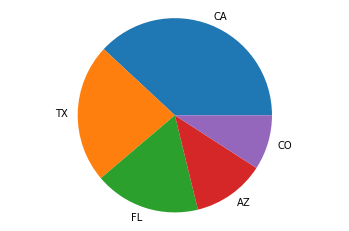

In [27]:
#IMPORTANTE: En esta representación gráfica sólo se encuentran los 5 Estados con más defunciones.

States = ['CA', 'TX', 'FL', 'AZ', 'CO']
plt.pie(State['state'].head(), labels=States)
plt.axis("equal")
plt.show()

###### En el Estado de California es dónde más fallecimientos a manos de la policía se han producido en los últimos cinco años. A una diferencia significativa de California, el siguiente Estado es Texas. A unos pocos puntos porcentuales por abajo de diferencia de Texas está Florida.

###### De acuerdo con datos extraidos de Statista, el Estado donde más armas están registradas es Texas, después Florida, en tercera posición Virginia y en cuarta posición California.

###### Los Estados con mayor población en 2019 son: California con casi 40 mill. de personas, después Texas con 29 mill., en tercer lugar Florida con 21.5 mill. de personas y en cuarto lugar Nueva York con casi 20 mill. de población.

### CONCLUSIÓN

###### Tras el análisis se observa que lo más común es que el fallecido por causa de una acción policial norteamericana sea varón de entre 36 y 37 años de edad. Existe una presencia elevada, de 22% a 23% de los casos, de que el sujeto tenga relación con alguna enfermedad mental. 
###### En función de la raza, los blancos y asiáticos tienen una representación en los fallecimientos menor que su representación en la población. Sin embargo, los hispanos y los afroamericanos ocupan un porcentaje de fallecimientos por actuación policial mayor que su representación en la población estadounidense. De todos modos, en este informe, no se ha estudiado cual puede ser la causa de estos datos.
###### Es común que la persona fallecida lleve algún tipo de arma, ya sea de fuego o blanca, a la hora de ser abatido. Y, normalmente, el fallecido no trata de huir de la policía al ser abatido.
###### Los Estados donde mayor número de muertes se han producido a manos de la policía son los Estados con una población más elevada y dónde más armas hay registradas. Obviamente, los registros de armas también van ligados a la población total.

### REFERENCIAS

###### [Kaggle](https://www.kaggle.com)
###### *Cunef, 2020. "Asignatura programación Python".*
###### *Numython, Pedro Jorge De Los Santos, 2018. "Gráficas de pastel con Matplotlib".*
###### *Zendesk, Nora Mullen, 2020. "Uso de Markdow para el formato de texto".*
###### *Statista 2020. "Población de los EE.UU por raza".*
###### *Statista 2019. "Number of registered weapons in the U.S. in 2019, by state".*
###### *Statista 2020. "Resident population of the U.S. in 2019, by state (including the District of Columbia").*